In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/shaheer/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

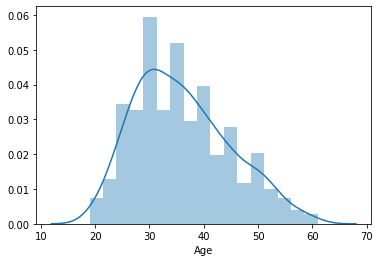

In [7]:
sns.distplot(data['Age'],hist=True)

In [8]:
data[data['Clicked on Ad']==1]['Country'].value_counts()

Australia           7
Ethiopia            7
Turkey              7
South Africa        6
Liberia             6
                   ..
Azerbaijan          1
Cook Islands        1
Bhutan              1
French Polynesia    1
Tunisia             1
Name: Country, Length: 215, dtype: int64

In [9]:
data['Country'].value_counts().head(15)

France            9
Czech Republic    9
Liberia           8
Afghanistan       8
Micronesia        8
South Africa      8
Senegal           8
Turkey            8
Peru              8
Greece            8
Cyprus            8
Australia         8
Taiwan            7
Albania           7
Western Sahara    7
Name: Country, dtype: int64

Timestamp has a value type `string` so I am converting into a datetime objects

In [10]:
data['Timestamp'] = pd.to_datetime(data['Timestamp']) 

In [11]:
data['Month'] = data['Timestamp'].dt.month 

In [12]:
data['Day'] = data['Timestamp'].dt.day 

In [13]:
data['Hour'] = data['Timestamp'].dt.hour 

In [14]:
data['Weekday'] = data['Timestamp'].dt.dayofweek 

Dropping timestamp column to avoid redundancy

In [15]:
data = data.drop(['Timestamp'], axis=1)

In [16]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


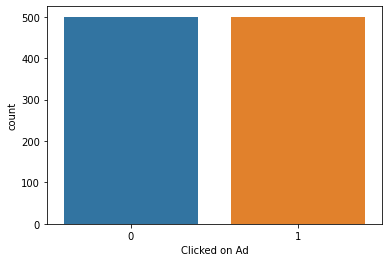

In [17]:
sns.countplot(x = 'Clicked on Ad', data=data)

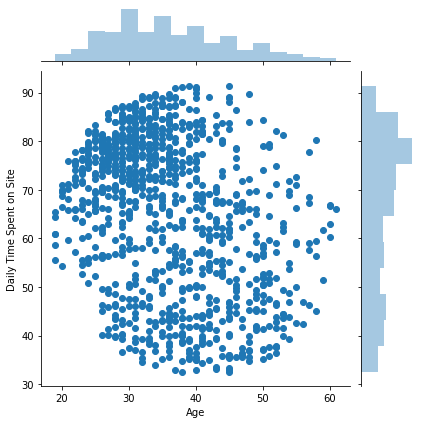

In [18]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=data)

We can see that more people aged between 30 to 40 are spending more time on site daily.

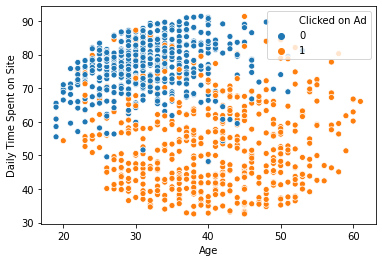

In [19]:
sns.scatterplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = data)

We can see that more people aged between 20 to 40 are spending more time on site daily but less chances of them to click on the ads.

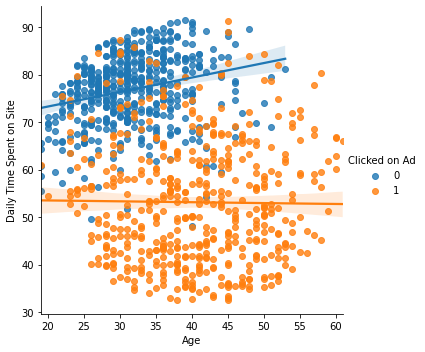

In [20]:
sns.lmplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = data) 

We can see that people that are younger and spends more time on site click on the ads less and people who are in between 25-55 and spends less time click on the ads more.

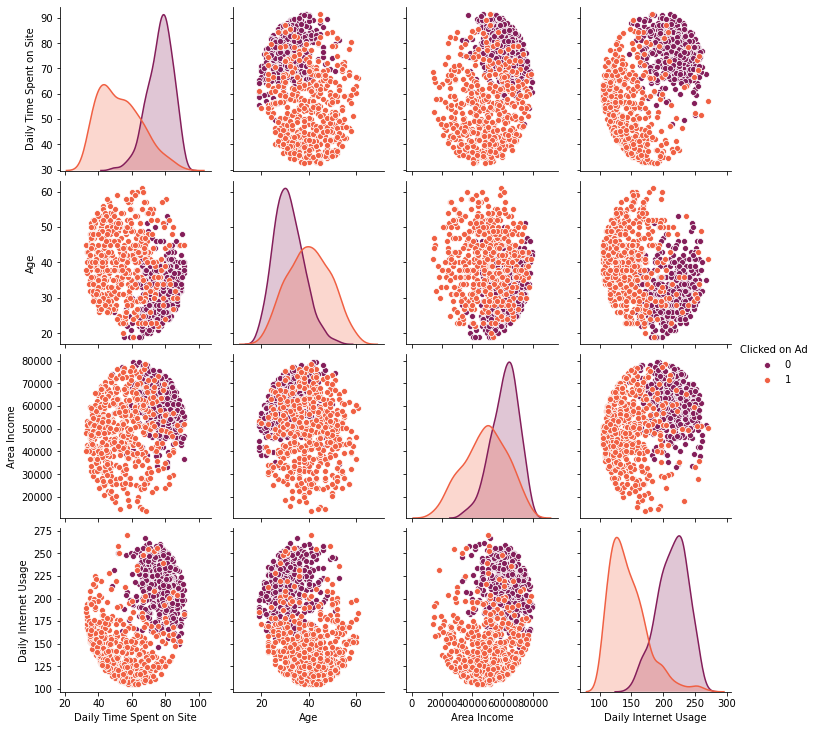

In [21]:
sns.pairplot(data, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

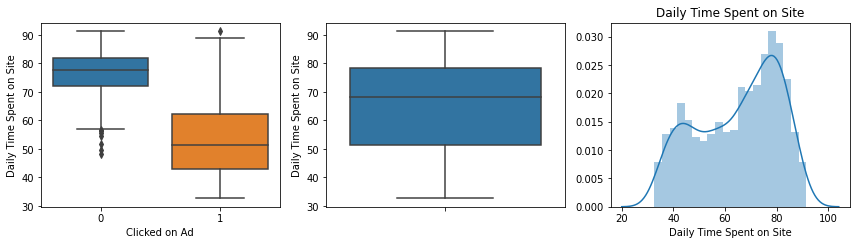

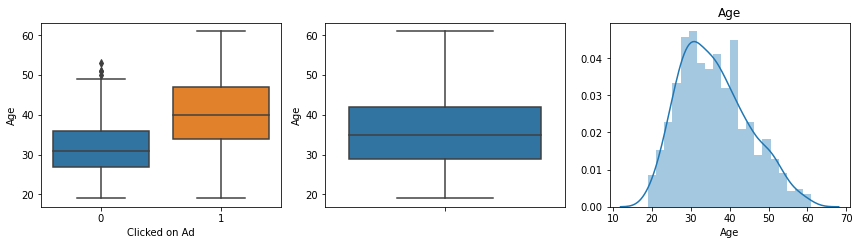

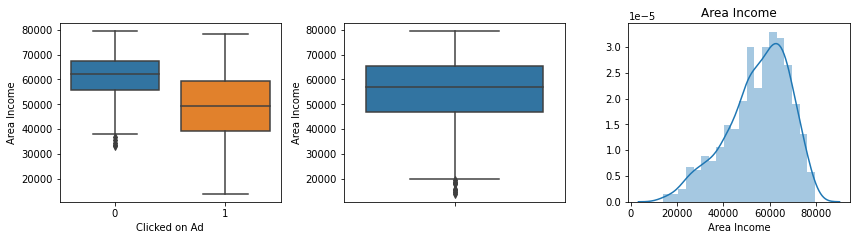

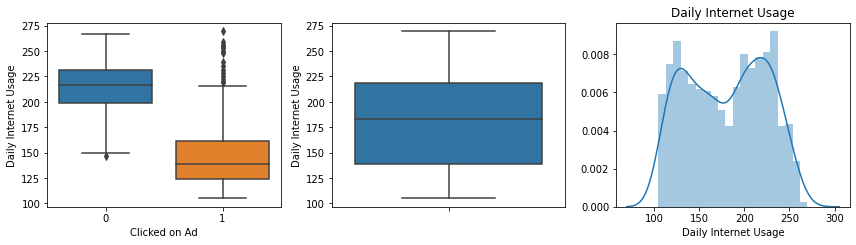

In [22]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (12, 6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data= data, y=data[i],x='Clicked on Ad')
    plt.subplot(2,3,2)
    sns.boxplot(data= data, y=data[i])
    plt.subplot(2,3,3)
    sns.distplot(data[i],bins= 20,)       
    plt.tight_layout()
    plt.title(i)    
    plt.show()

In [23]:
print('oldest person didn\'t clicked on the ad was of was of:', data['Age'].max(), 'Years')
print('oldest person who clicked on the ad was of:', data[data['Clicked on Ad']==0]['Age'].max(), 'Years')

oldest person didn't clicked on the ad was of was of: 61 Years
oldest person who clicked on the ad was of: 53 Years


In [24]:
print('Youngest person was of:', data['Age'].min(), 'Years')
print('Youngest person who clicked on the ad was of:', data[data['Clicked on Ad']==0]['Age'].min(), 'Years')

Youngest person was of: 19 Years
Youngest person who clicked on the ad was of: 19 Years


In [25]:
print('Average age was of:', data['Age'].mean(), 'Years')

Average age was of: 36.009 Years


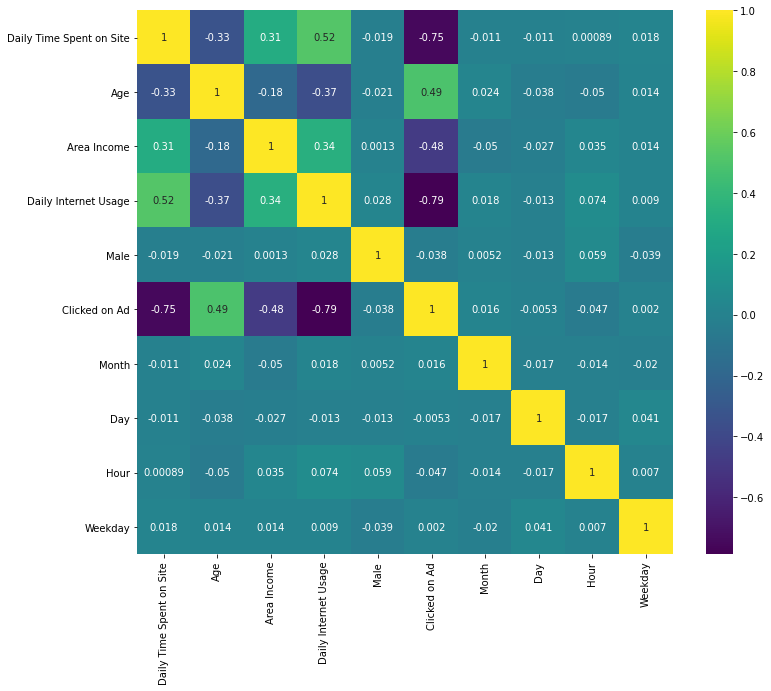

In [26]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), cmap='viridis', annot = True)

In [27]:
from sklearn.model_selection import train_test_split

x = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = data['Clicked on Ad']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')

In [30]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions = model.predict(x_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[85  4]
 [16 95]]


In [34]:
model.coef_

array([[-5.55704954e-02,  2.61911546e-01, -1.53274922e-05,
        -2.70202278e-02,  1.79079055e-03]])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9

In [41]:
#Hyper-tuning
log_reg = {"C":np.logspace(-4,4,30),
          "solver":["liblinear"]}

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+0

In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0003562247890262444}

In [44]:
rs_log_reg.score(x_test,y_test)

0.895

In [45]:
new_preds = rs_log_reg.predict(x_test)

In [47]:
np.array(new_preds)

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

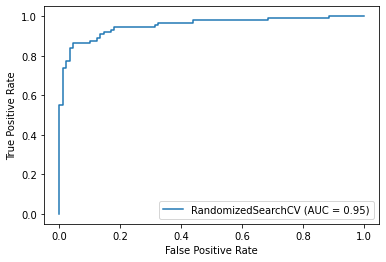

In [48]:
plot_roc_curve(rs_log_reg,x_test,y_test)

In [49]:
sns.set(font_scale=1.5)

def plot_confusion_matrix(y_test,y_results):
    """
    Plotting the confusion matrix
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_results),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

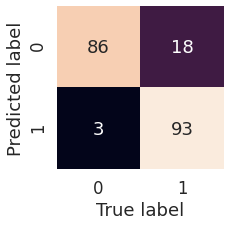

In [50]:
plot_confusion_matrix(new_preds,y_test)

In [51]:
print(classification_report(new_preds,y_test))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       104
           1       0.84      0.97      0.90        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



In [52]:
clf = LogisticRegression(C=0.0003562247890262444,
                        solver="liblinear")
cv_accuracy = cross_val_score(clf,x,y,cv=5,scoring="accuracy")

In [53]:
cv_accuracy

array([0.94 , 0.865, 0.88 , 0.9  , 0.92 ])

In [54]:
np.mean(cv_accuracy)

0.901

In [55]:
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")

In [56]:
cv_precision

array([0.94897959, 0.96202532, 0.90425532, 0.96511628, 0.96666667])

In [57]:
np.mean(cv_precision)

0.9494086346355604

In [58]:
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")

In [59]:
np.mean(cv_recall)

0.8480000000000001

In [60]:
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")

In [61]:
np.mean(cv_f1)

0.8946214404649437

In [62]:
cv_metrics = pd.DataFrame({"Accuracy":cv_accuracy,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1 Score":cv_f1})

In [63]:
cv_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.940,0.948980,0.93,0.939394
1,0.865,0.962025,0.76,0.849162
2,0.880,0.904255,0.85,0.876289
3,0.900,0.965116,0.83,0.892473
4,0.920,0.966667,0.87,0.915789
